In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
shoppers_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Online%20Shoppers%20Intention.csv',sep = ',')
shoppers_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
shoppers_df.shape

(12330, 18)

#### Missing Values

In [4]:
shoppers_df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [5]:
shoppers_df.dropna(inplace = True)

#### EDA

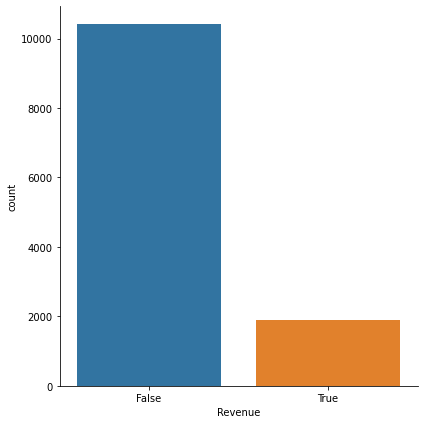

In [6]:
sns.catplot(x = 'Revenue', kind = 'count', data = shoppers_df, height = 6)

In [7]:
shoppers_df.groupby('Weekend')['Revenue'].value_counts()

Weekend  Revenue
False    False      8042
         True       1409
True     False      2366
         True        499
Name: Revenue, dtype: int64

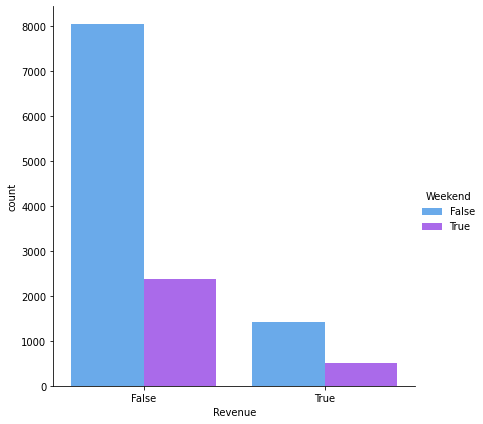

In [8]:
sns.catplot(x = 'Revenue', kind = 'count', hue = 'Weekend', data = shoppers_df, height = 6, palette = 'cool')

##### Chi2-Test To Check if Weekend has Impact on Revenue

In [9]:
dataset_table = pd.crosstab(shoppers_df['Weekend'], shoppers_df['Revenue'])
print(dataset_table)

Revenue  False  True
Weekend             
False     8042  1409
True      2366   499


In [10]:
observed_values = dataset_table.values

In [11]:
import scipy.stats as stats
val = stats.chi2_contingency(observed_values) 

In [12]:
expected_values = val[3]
expected_values

array([[7986.84702826, 1464.15297174],
       [2421.15297174,  443.84702826]])

In [13]:
no_of_rows = len(dataset_table.iloc[0:2,0])
no_of_columns = len(dataset_table.iloc[0,0:2])
ddof = (no_of_rows-1) * (no_of_columns-1)
print("Degree of Freedom : " , ddof)

Degree of Freedom :  1


In [14]:
from scipy.stats import chi2
chi_square = sum([(o-e)**2./e for o,e in zip(observed_values, expected_values)])

In [15]:
chi_square_statistic = chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 10.56814670143137


In [16]:
alpha = 0.05
p_value  = 1 - chi2.cdf(x = chi_square_statistic, df = ddof)
p_value

0.0011505301642842358

In [17]:
if p_value <= alpha:
    print("Reject H0, There is a relationship b/w 2 Revenue & Weekend")
else:
    print("Retain H0, There is no relationship between 2 Revenue & Weekend")

Reject H0, There is a relationship b/w 2 Revenue & Weekend


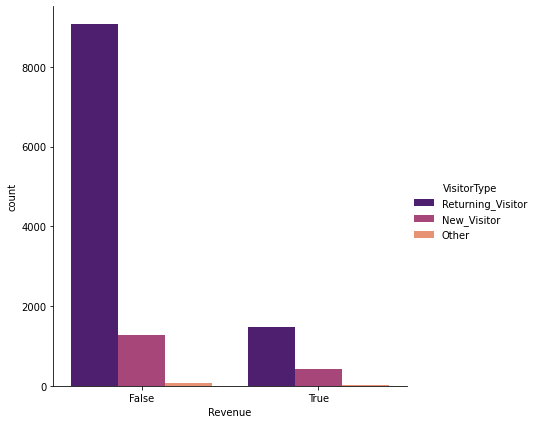

In [18]:
sns.catplot(x = 'Revenue', kind = 'count', hue = 'VisitorType', data = shoppers_df, height = 6, palette = 'magma')

In [19]:
shoppers_df[shoppers_df['Revenue'] == True]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
65,3.0,87.833333,0.0,0.00,27.0,798.333333,0.000000,0.012644,22.916036,0.8,Feb,2,2,3,1,Returning_Visitor,False,True
76,10.0,1005.666667,0.0,0.00,36.0,2111.341667,0.004348,0.014493,11.439412,0.0,Feb,2,6,1,2,Returning_Visitor,False,True
101,4.0,61.000000,0.0,0.00,19.0,607.000000,0.000000,0.026984,17.535959,1.0,Feb,1,1,7,4,Returning_Visitor,True,True
188,9.0,111.500000,1.0,48.50,49.0,1868.819697,0.000000,0.020709,1.706015,0.0,Mar,2,2,7,2,Returning_Visitor,False,True
196,2.0,56.000000,1.0,144.00,67.0,2563.783333,0.000000,0.005797,19.342650,0.0,Mar,2,2,4,2,New_Visitor,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272,6.0,133.466667,0.0,0.00,44.0,2664.445833,0.002041,0.010884,97.860836,0.0,Nov,2,2,1,3,Returning_Visitor,True,True
12276,7.0,139.575000,0.0,0.00,30.0,986.500000,0.000000,0.011429,36.392861,0.0,Dec,2,10,1,2,New_Visitor,False,True
12311,1.0,0.000000,2.0,211.25,144.0,4627.489571,0.001361,0.020664,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
12312,7.0,150.357143,1.0,9.00,221.0,11431.001240,0.011149,0.021904,1.582473,0.0,Nov,2,5,1,2,Returning_Visitor,True,True


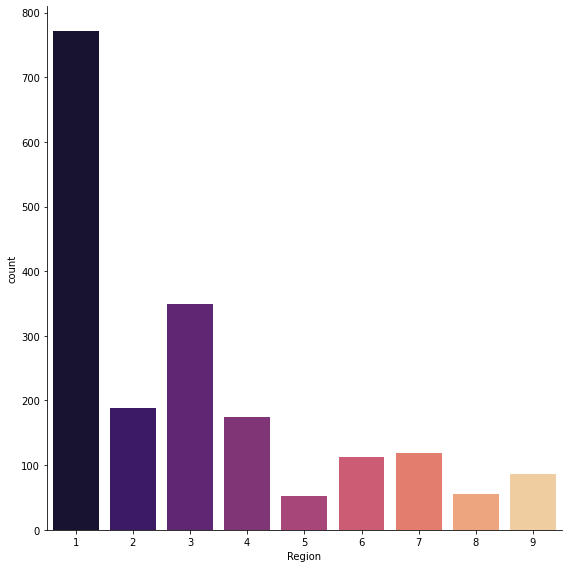

In [20]:
sns.catplot(x = 'Region', kind = 'count', data = shoppers_df[shoppers_df['Revenue'] == True], height = 8, palette = 'magma')

#### Data Augmentation
  * To generate more Input data for training by using upsampling.

In [21]:
shoppers_df['Revenue'].value_counts()

False    10408
True      1908
Name: Revenue, dtype: int64

In [22]:
from sklearn.utils import resample
df_0 = shoppers_df[shoppers_df['Revenue'] == False]
df_1 = shoppers_df[shoppers_df['Revenue'] == True]

In [23]:
df_1_upsample = resample(df_1, n_samples = 8000, replace = True, random_state = 123)

In [24]:
shoppers_df2 = pd.concat([df_0, df_1_upsample])

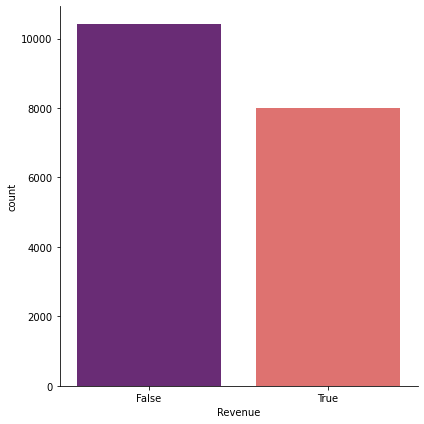

In [25]:
sns.catplot(x = 'Revenue', kind = 'count', data = shoppers_df2, height = 6, palette = 'magma')

#### Data Pre-Processing

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()
le.fit(shoppers_df2['VisitorType'].drop_duplicates())

LabelEncoder()

In [28]:
shoppers_df2['VisitorType'] = le.transform(shoppers_df2['VisitorType'])

In [29]:
le = LabelEncoder()
le.fit(shoppers_df2['Month'].drop_duplicates())

LabelEncoder()

In [30]:
shoppers_df2['Month'] = le.transform(shoppers_df2['Month'])

In [31]:
shoppers_df2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.000,0.0,0.00,1.0,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,False,False
1,0.0,0.000,0.0,0.00,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.000,0.0,-1.00,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,False,False
3,0.0,0.000,0.0,0.00,2.0,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,False,False
4,0.0,0.000,0.0,0.00,10.0,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.0,203.600,1.0,0.00,42.0,1052.400000,0.000000,0.004545,37.357258,0.0,7,2,2,5,2,2,False,True
7084,0.0,0.000,0.0,0.00,54.0,4749.250000,0.004938,0.029938,8.285119,0.0,8,2,2,8,1,2,True,True
11927,4.0,140.675,1.0,97.75,70.0,2721.555108,0.001952,0.017190,10.535915,0.0,7,1,2,1,10,2,True,True
11083,1.0,11.000,0.0,0.00,20.0,1166.333333,0.000000,0.002632,14.127370,0.0,7,2,2,2,2,2,True,True


#### Coorelation

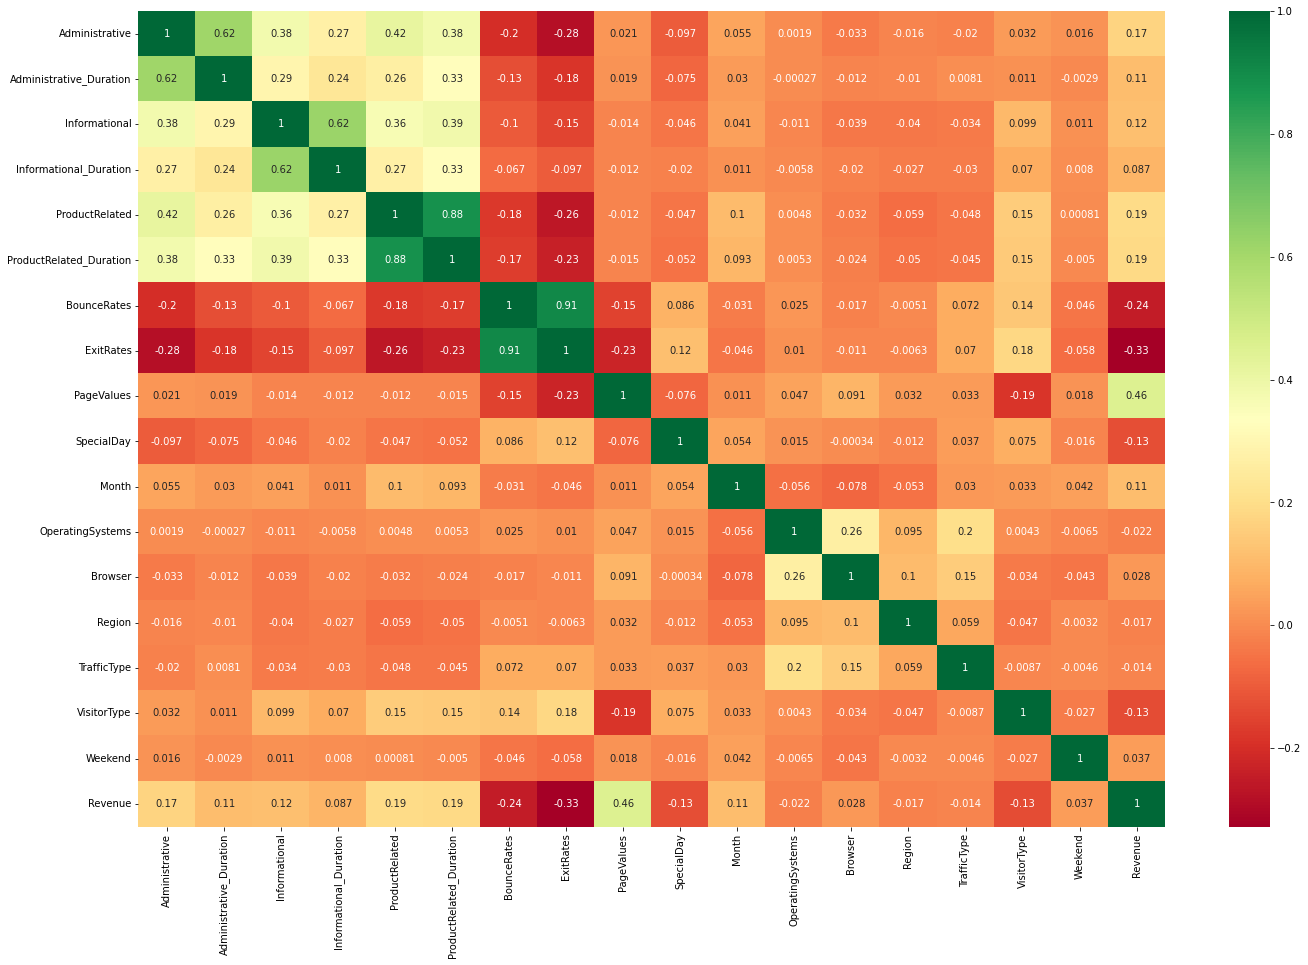

In [32]:
plt.figure(figsize=(23,15))
sns.heatmap(shoppers_df2.corr(), annot = True, cmap = 'RdYlGn')

#### Features

In [33]:
X = shoppers_df2.drop(['ProductRelated', 'BounceRates', 'Revenue'], axis = 1)
Y = shoppers_df2['Revenue']

Train and Test Split

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

##### KNN Algorithm

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [37]:
knn.score(x_test, y_test)

0.7770233568712657

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors' : np.arange(1, 60)}

In [40]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 7)
knn_cv.fit(X, Y)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])})

In [41]:
knn_cv.best_params_

{'n_neighbors': 1}

In [42]:
knn_cv.best_score_

0.9385588892867318

Minimum error:- 0.06518196632265073 at K = 0


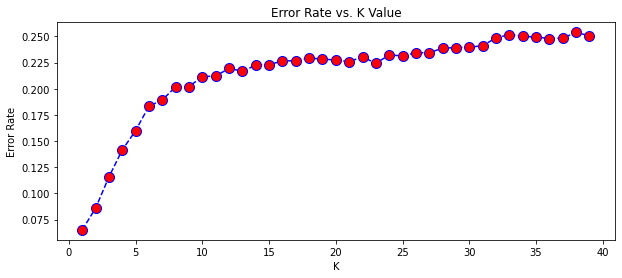

In [76]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,4))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))


In [78]:
import seaborn as sns

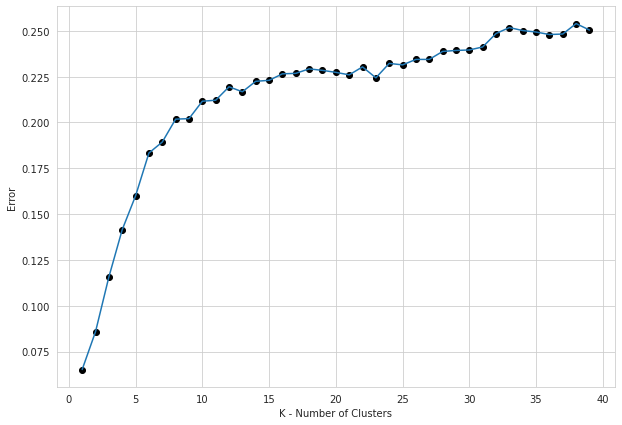

In [81]:

sns.set_style('whitegrid')
plt.figure(figsize = (10,7))
plt.plot(range(1,40), error_rate)
plt.scatter(range(1,40), error_rate, marker = 'o', color = 'k')
plt.xlabel('K - Number of Clusters')
plt.ylabel('Error')
plt.show()

#### Final KNN Model with n_neighbours = 6

In [74]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [75]:
knn.score(x_test, y_test)

0.8166757197175448

#### Classification Metrics

In [51]:
y_pred = knn.predict(x_test)
y_pred

array([False,  True, False, ...,  True, False, False])

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[1625,  424],
       [ 273, 1360]])

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.79      0.82      2049
        True       0.76      0.83      0.80      1633

    accuracy                           0.81      3682
   macro avg       0.81      0.81      0.81      3682
weighted avg       0.81      0.81      0.81      3682



Minimum error:- 0.06518196632265073 at K = 0


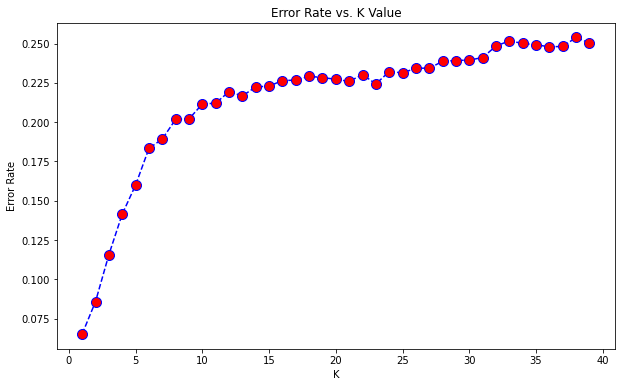

In [58]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [1]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '0.0f', cmap = 'magma')

NameError: ignored